In [24]:
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
import yfinance as yf
%matplotlib inline
from keras.preprocessing.sequence import TimeseriesGenerator
import plotly.graph_objects as go



from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [3]:
# Historical Carnival Cruise Stock Price:
# OHLCV using yfinance
# Load the stocks data
ccl = yf.download("CCL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
ccl.dropna(inplace=True)
#ccl.head()

[*********************100%***********************]  1 of 1 completed


In [4]:
# Historical Delta Airlines Stock Price:
# OHLCV using yfinance
# Load the stocks data
dal = yf.download("DAL", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
dal.dropna(inplace=True)
#dal.head()

[*********************100%***********************]  1 of 1 completed


In [5]:
# Historical ETSY Stock Price:
# OHLCV using yfinance
# Load the stocks data
etsy = yf.download("ETSY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
etsy.dropna(inplace=True)
#etsy.head()

[*********************100%***********************]  1 of 1 completed


In [6]:
# Historical L Brands Stock Price:
# OHLCV using yfinance
# Load the stocks data
LB = yf.download("LB", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
LB.dropna(inplace=True)
#LB.head()

[*********************100%***********************]  1 of 1 completed


In [7]:
# Historical SPY Stock Price:
# OHLCV using yfinance
# Load the stocks data
spy = yf.download("SPY", start="2016-01-01", end="2021-01-21", 
    index_col="Date", infer_datetime_format=True, parse_dates=True)
spy.dropna(inplace=True)
#spy.head()

[*********************100%***********************]  1 of 1 completed


In [9]:
ccl_df = ccl[['Close']].copy()
dal_df = dal[['Close']].copy()
etsy_df = etsy[['Close']].copy()
LB_df = LB[['Close']].copy()
spy_df = spy[['Close']].copy()

In [10]:
ccl_df.rename(columns = {'Close':'CCL'}, inplace = True) 
dal_df.rename(columns = {'Close':'DAL'}, inplace = True) 
etsy_df.rename(columns = {'Close':'ETSY'}, inplace = True) 
LB_df.rename(columns = {'Close':'LB'}, inplace = True) 
spy_df.rename(columns = {'Close':'SPY'}, inplace = True) 
#spy_df.head()

In [11]:
dfs = [ccl_df, dal_df, etsy_df, LB_df,spy_df ]
df = pd.concat(dfs,axis=1,join="outer",ignore_index=False)
df.tail()

,CCL,DAL,ETSY,LB,SPY
Date,,,,,
2021-01-13,20.100000,40.450001,207.029999,46.160000,379.790009
2021-01-14,20.920000,41.470001,211.520004,44.980000,378.459991
2021-01-15,20.790001,39.980000,204.419998,45.200001,375.700012
2021-01-19,20.870001,40.310001,221.309998,45.730000,378.649994
2021-01-20,20.780001,41.619999,215.690002,45.560001,383.890015


### Tree decision and Linear Regression prediction models

In [26]:
precovid_df = df['2016-01-01' :'2020-02-20']
precovid_df.tail()

,CCL,DAL,ETSY,LB,SPY
Date,,,,,
2020-02-13,43.200001,59.130001,52.970001,24.280001,337.059998
2020-02-14,42.599998,58.900002,53.160000,24.340000,337.600006
2020-02-18,42.919998,58.720001,53.320000,24.090000,336.730011
2020-02-19,43.340000,58.509998,53.180000,24.600000,338.339996
2020-02-20,42.500000,58.380001,54.389999,23.420000,336.950012


In [27]:
covid_df = df['2020-02-21' :'2021-01-21']
covid_df.head()

,CCL,DAL,ETSY,LB,SPY
Date,,,,,
2020-02-21,41.689999,57.869999,53.700001,24.070000,333.480011
2020-02-24,37.759998,54.230000,51.330002,23.650000,322.420013
2020-02-25,35.840000,50.889999,49.889999,23.500000,312.649994
2020-02-26,33.139999,49.590000,50.689999,22.780001,311.500000
2020-02-27,31.850000,48.189999,57.919998,23.049999,297.510010


In [29]:
precovid_df.shape

(1040, 5)

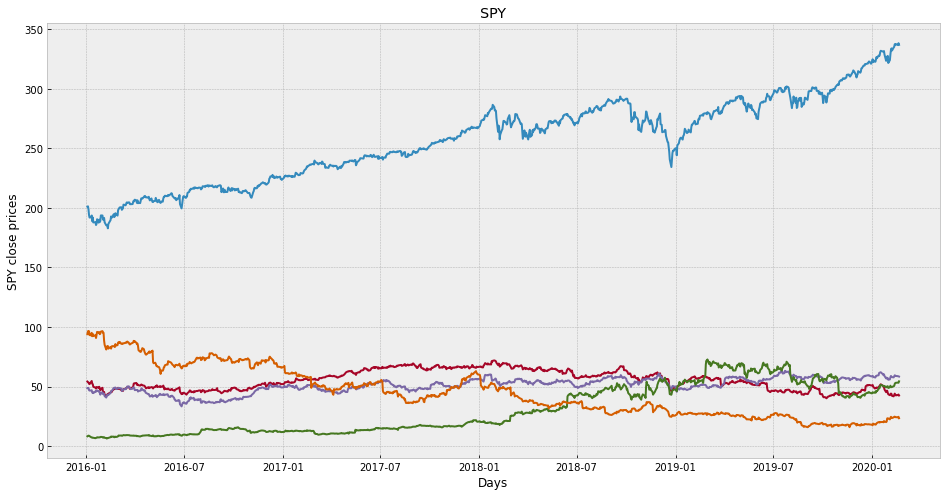

In [37]:
#Visualize the close price data
plt.figure(figsize=(16,8))
plt.title("SPY")
plt.xlabel('Days')
plt.ylabel("SPY close prices")
plt.plot(precovid_df['SPY']), plt.plot(precovid_df['CCL']), plt.plot(precovid_df['DAL']), plt.plot(precovid_df['ETSY']), plt.plot(precovid_df['LB'])
plt.show()

In [39]:
# Creating a variable to predict the 'x' days out into the future
future_days = 25
#Create a new column (target) shifted 'x' days up
precovid_df["Prediction"] = precovid_df[['SPY']].shift(-future_days)
precovid_df.tail()

C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,CCL,DAL,ETSY,LB,SPY,Prediction
Date,,,,,,
2020-02-13,43.200001,59.130001,52.970001,24.280001,337.059998,NaN
2020-02-14,42.599998,58.900002,53.160000,24.340000,337.600006,NaN
2020-02-18,42.919998,58.720001,53.320000,24.090000,336.730011,NaN
2020-02-19,43.340000,58.509998,53.180000,24.600000,338.339996,NaN
2020-02-20,42.500000,58.380001,54.389999,23.420000,336.950012,NaN


In [41]:
#Create a feature data set (x) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(precovid_df.drop(['Prediction', "CCL", "DAL", "ETSY", "LB"], 1))[:-future_days]
print(X)

[[201.02000427]
 [201.36000061]
 [198.82000732]
 ...
 [325.70999146]
 [327.95001221]
 [327.45001221]]


In [42]:
#Create the target data set (y) and coverted to a numpy aaray and get all of the target values except the last "x" rows/days
y = np.array(precovid_df['Prediction'])[:-future_days]
print(y)

[185.42999268 185.27000427 182.86000061 ... 336.73001099 338.33999634
 336.95001221]


In [45]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [54]:
#Create the models 
#Create the decision tree regresor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
lr = LinearRegression().fit(x_train, y_train)


In [61]:
#Get the last 'x' rows of the feature data set
x_future = precovid_df.drop(['Prediction', "CCL", "DAL", "ETSY", "LB"], 1) [:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[313.88000488],
       [313.52999878],
       [314.42001343],
       [317.13000488],
       [317.32000732],
       [319.5       ],
       [319.57000732],
       [319.58999634],
       [320.8999939 ],
       [320.73001099],
       [321.22000122],
       [321.23001099],
       [322.94000244],
       [322.85998535],
       [321.07998657],
       [321.85998535],
       [324.86999512],
       [322.41000366],
       [323.64001465],
       [322.73001099],
       [324.45001221],
       [326.6499939 ],
       [325.70999146],
       [327.95001221],
       [327.45001221]])

In [62]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[322.41000366 324.86999512 331.95001221 331.29998779 331.29998779
 328.76998901 328.76998901 323.5        326.89001465 326.61999512
 327.67999268 327.67999268 329.05999756 329.05999756 332.85998535
 333.98001099 332.20001221 334.67999268 335.26000977 329.05999756
 337.05999756 337.6000061  332.20001221 336.95001221 336.95001221]

[315.29911539 314.95926514 315.82345494 318.45481272 318.63930201
 320.75603957 320.82401555 320.84342456 322.11541096 321.95036031
 322.42613288 322.4358522  324.09622619 324.0185309  322.29018093
 323.0475471  325.9702178  323.58160597 324.7759267  323.89232789
 325.5624212  327.69856777 326.78584064 328.96086448 328.47537259]


C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



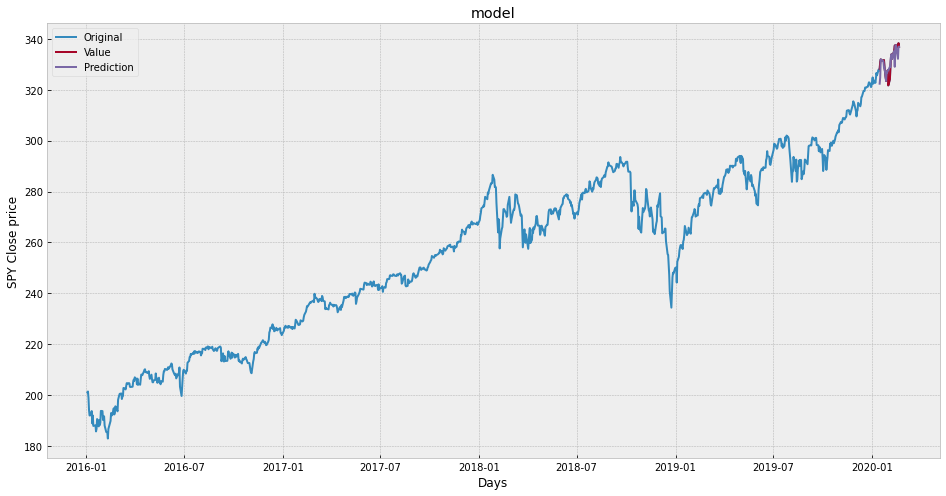

In [63]:
#Vizualize the data
predictions= tree_prediction

valid = precovid_df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Tree Prediction model')
plt.xlabel('Days')
plt.ylabel('SPY Close price')
plt.plot(precovid_df['SPY'])
plt.plot(valid[['SPY', 'Predictions']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()


C:\Users\vmier\anaconda3\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



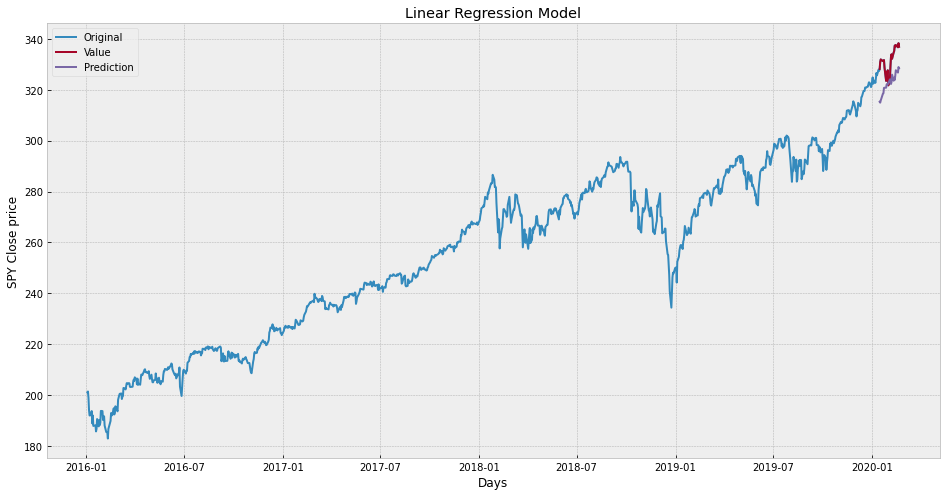

In [64]:

#Visualizing the data
predictions= lr_prediction

valid = precovid_df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days')
plt.ylabel('SPY Close price')
plt.plot(precovid_df['SPY'])
plt.plot(valid[['SPY', 'Predictions']])
plt.legend(['Original', 'Value', 'Prediction'])
plt.show()